<a href="https://colab.research.google.com/github/franconoronha/treinamento-h2ia/blob/main/8_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina Supervisionado
## Classificação com KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

,s_l,s_w,p_l,p_w,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


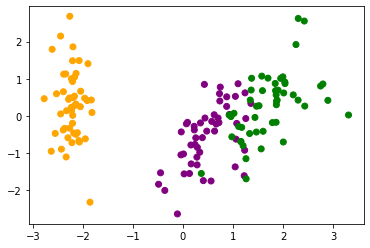

In [22]:
iris = load_iris()
data = pd.DataFrame(iris.data)
target = iris.target
data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

pca = PCA(n_components=2)
data_array = StandardScaler().fit_transform(data)
data_array = pca.fit_transform(data_array)

colors = ["orange", "purple", "green"]
plt.scatter(data_array[:,0], data_array[:,1], c = [colors[i] for i in target])

t = np.reshape(target, (len(target),1))
data_array = np.append(data_array, t, axis=1)

data["label"] = target
data.head()

In [47]:
def distancia_euclidiana(a,b):
  return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

K = 7

np.random.shuffle(data_array)
training_data = data_array[:125]
test_data = data_array[125:]

def avaliar():
  confusion_matrix = np.zeros((3,3))
  for test in test_data:
      predicao = knn(test)
      confusion_matrix[int(test[2]), predicao] += 1
    
  total = confusion_matrix.sum()
  TP = confusion_matrix.diagonal().sum()
  print(confusion_matrix)
  print(f"Acurácia: {TP / total}")

def knn(ponto):
  votes = np.zeros(3)
  dists = [distancia_euclidiana(ponto, t) for t in training_data]

  near = np.argpartition(dists, K) # indices das K menores distancias
  knn = training_data[near[:K]]
  for nn in knn:
    votes[int(nn[2])] += 1
    
  return int(np.argmax(votes))

avaliar()

[[ 6.  0.  0.]
 [ 0.  8.  1.]
 [ 0.  0. 10.]]
Acurácia: 0.96
